In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from src.core import Engine
from src.agents import ETFTrader, FundamentalTrader, TrendTrader, MeanReversionTrader, ZeroIntelligenceTrader

In [116]:
initial_price = 100

agents = (
    [ZeroIntelligenceTrader(cash=500, stocks=0, noise=0.5) for i in range(80)]
    + [TrendTrader(cash=1000 * w, stocks=0, window_size=w) for w in [10, 15, 20, 30, 40, 50]]
    + [MeanReversionTrader(cash=1000 * w, stocks=0, window_size=w) for w in [3, 4, 5, 7, 10]]
    + [
        FundamentalTrader(cash=10_000_000, stocks=0, pi=1e-3, gdp=1e-3, price0=initial_price, pct=0.01),
        ETFTrader(cash=20_000_000, stocks=0, pct=0.01),
    ]
)

In [117]:
eng = Engine()

In [118]:
eng.run(
    agents=agents,
    initial_price=initial_price,
    n_steps=100,
)

0 92.1385205517375
1 91.58305393432735
2 88.88886832609043
3 79.46662189770991
4 82.32651768666867
5 80.01888616231375
6 78.56627603071601
7 81.80088835714108
8 82.0383216846273
9 80.12189502179466
10 86.54189096593804
11 87.3978342696559
12 86.26333797744566
13 86.48103203439531
14 87.03327819067388
15 85.17367569592244
16 85.44854829183949
17 86.6771558770488
18 85.17876359896465
19 92.48341618269623
20 92.33144812209039
21 98.98303572631657
22 102.97292062864224
23 102.9762322741538
24 116.54715375976585
25 132.53169437819545
26 145.50171481137326
27 140.05883495168703
28 144.4658058264156
29 162.6049612898078
30 165.35092228751583
31 175.7436368280127
32 194.7848361687685
33 194.36960585964388
34 181.74882576549075
35 197.7144055267832
36 228.0726423107608
37 225.89339039123226
38 236.00372518675672
39 214.8289885988536
40 226.1039657740895
41 227.43895534334314
42 243.06723039326192
43 217.7270770082739
44 216.38004399328784
45 196.98835665132293
46 200.35488258140003
47 183.29103

In [119]:
from collections import defaultdict

In [120]:
import pandas as pd

In [121]:
stats = defaultdict(list)
for b in eng.stats_monitor.balance_stats:
    for cls, s in b.items():
        stats[str(cls)].append(s["total_stocks"])
stats = pd.DataFrame(stats)

<Axes: >

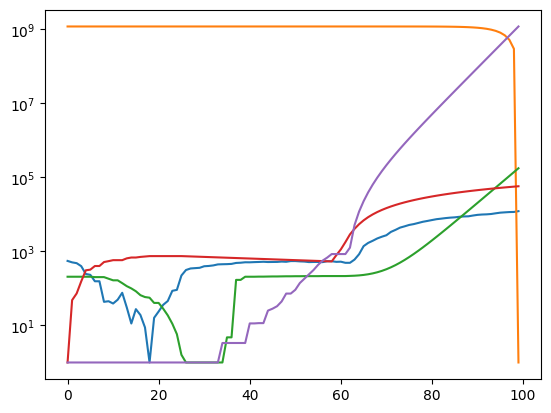

In [122]:
(stats + abs(stats.min()) + 1).plot(logy=True, legend=0)

<Axes: >

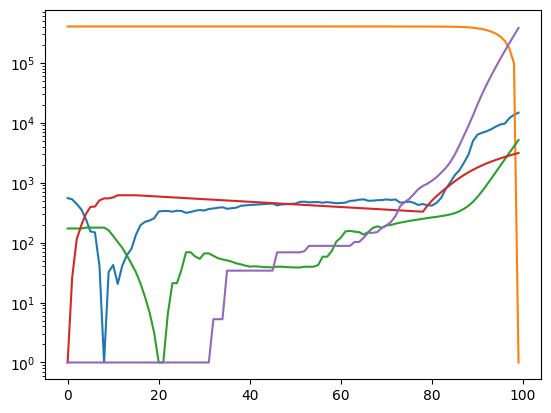

In [63]:
(stats + abs(stats.min()) + 1).plot(logy=True, legend=0)

In [26]:
e = [b[ZeroIntelligenceTrader]["total_equity"] for b in eng.stats_monitor.balance_stats]

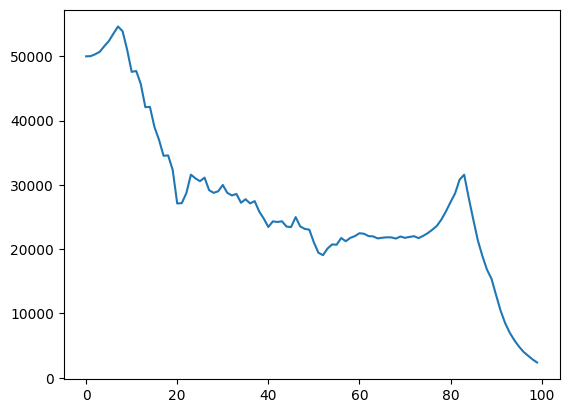

In [27]:
import matplotlib.pyplot as plt
plt.plot(e)

In [35]:
e[83:89]

[31586.749067906745,
 27967.922340594163,
 24621.42736677629,
 21367.98698997196,
 18935.57765447148,
 16824.933543434232]

In [36]:
eng.t[84]

[Transaction(price=35.73579349734504, quantity=133.0124542968192, buyer=<src.agents.fundamentalist.FundamentalTrader object at 0x7fdcc14431f0>, seller=<src.agents.technical.TrendTrader object at 0x7fdcc1862350>),
 Transaction(price=26.033034867450695, quantity=2.7918797581405386, buyer=<src.agents.technical.MeanReversionTrader object at 0x7fdcc1860730>, seller=<src.agents.technical.TrendTrader object at 0x7fdcc1862350>),
 Transaction(price=21.189243263393223, quantity=2.67182357952955, buyer=<src.agents.technical.MeanReversionTrader object at 0x7fdcc18607c0>, seller=<src.agents.technical.TrendTrader object at 0x7fdcc1862350>),
 Transaction(price=18.15450037729764, quantity=1.0378828964800968, buyer=<src.agents.zero_intelligence.ZeroIntelligenceTrader object at 0x7fdcc1442f50>, seller=<src.agents.technical.TrendTrader object at 0x7fdcc1862350>),
 Transaction(price=18.12352454241315, quantity=0.6809075542730125, buyer=<src.agents.zero_intelligence.ZeroIntelligenceTrader object at 0x7fdcc

In [8]:
agents[0].is_bankrupt

False

In [9]:
agents[6].is_bankrupt

False

In [55]:
eng.stats_monitor.trade_stats[-2]

defaultdict(collections.Counter,
            {src.agents.fundamentalist.FundamentalTrader: Counter({'total_buy_transactions': 1,
                      'total_buy_transactions_quantity': 92.50264039655299,
                      'total_buy_transactions_cash': 2818.3736510327303,
                      'mean_buy_transaction_price': 30.468034630693136,
                      'median_buy_transaction_price': 30.468034630693136,
                      'mean_weighted_buy_transaction_price': 30.46803462739939}),
             src.agents.technical.TrendTrader: Counter({'total_sell_transactions': 517,
                      'total_sell_transactions_quantity': 142115121113.85345,
                      'total_sell_transactions_cash': 8546.919456035735,
                      'mean_sell_transaction_price': 0.05893240848353543,
                      'median_sell_transaction_price': 3.948446918886643e-08,
                      'mean_weighted_sell_transaction_price': 6.014081674805383e-08}),
             src